In [1]:
import tensorflow as tf
import keras
import gc
import numpy
import pandas

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_tr,y_tr),(x_te,y_te) = mnist.load_data()

11501568/11490434 [==============================] - 131s 11us/step


In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_tr[0], cmap=plt.cm.binary) #colormap
plt.show() #show an image

In [5]:
from keras.utils import normalize

x_tr=normalize(x_tr, axis=1)
x_te=normalize(x_te, axis=1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [7]:
model=Sequential()

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(x_tr, y_tr, validation_split=(x_te, y_te), epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2622 - acc: 0.9224
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1067 - acc: 0.9672
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0719 - acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0544 - acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0407 - acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0309 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0243 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0202 - acc: 0.9933
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0179 - acc: 0.9939
Epoch 10/10
60000/60000 [==========================

In [9]:
val_loss, val_acc = model.evaluate(x_te, y_te)
print("Loss : ",val_loss)
print("Accuracy : ",val_acc)

10000/10000 [==============================] - 0s 28us/step
('Loss : ', 0.112611605189275)
('Accuracy : ', 0.975)


In [10]:
model.save('10_epoch_mnist_trained') #save model
load_model = keras.models.load_model('10_epoch_mnist_trained')  #load

In [13]:
pred=load_model.predict([x_te][0])
print(pred)

[[2.7251627e-17 1.6544760e-12 4.3037041e-12 ... 1.0000000e+00
  1.2521781e-14 2.1336479e-12]
 [2.1895678e-20 9.7805213e-09 1.0000000e+00 ... 1.8353397e-18
  1.8281114e-14 1.2682417e-25]
 [5.1239213e-12 9.9999595e-01 5.1953757e-09 ... 1.6577421e-06
  5.7016035e-07 5.1005415e-11]
 ...
 [9.5227239e-15 2.5735926e-11 1.4956623e-10 ... 7.9625853e-09
  1.6037250e-09 2.0334134e-07]
 [1.9335684e-09 8.2557263e-13 1.5875608e-13 ... 4.8245349e-12
  5.2705436e-04 3.1268065e-15]
 [5.7302656e-15 1.2863383e-13 1.6835836e-13 ... 6.5792267e-18
  8.4141141e-13 7.0104843e-15]]


7


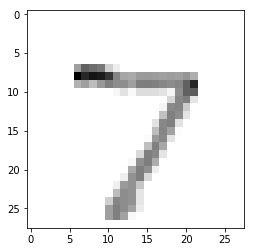

In [16]:
import numpy as np
print(np.argmax(pred[0]))
plt.imshow(x_te[0],cmap=plt.cm.binary)
plt.show()

In [17]:
# make it a function call

def get_array_label(arr_pos):
    
    pred=load_model.predict([x_te][arr_pos])
    print(np.argmax(pred[arr_pos]))
    plt.imshow(x_te[arr_pos],cmap=plt.cm.binary)
    plt.show()

7


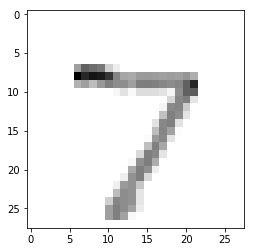

In [21]:
get_array_label(0)